# Contents

Import libraries and data

Scatterplot of resp death % and age group

Scatter plot of resp death and year

Scatter plot of resp death % and year

creating training and test set

fit regression object

Check the model performance statistics—MSE and R2 score.

potential data bias

# Import libraries and data

In [285]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [286]:
path=r'/Users/vanessalimsingh/Achievement 6 June 2024'

In [287]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'who_df_v2_updatedregionnames.csv'))

In [288]:
df['Region Name'].unique()

array(['Europe', 'North America', 'South America', 'Asia', 'Oceania',
       'Africa'], dtype=object)

In [289]:
df.head()

,Unnamed: 0,Region Code,Region Name,Country,Year,Sex,Age Group,Resp Deaths,Resp Deaths %,AS_Death rate/100 000,Death rate/100 000,Age Group Flag,Resp Deaths % levels
0,0,EU,Europe,Albania,1987,Male,[All],311.0,3.227480,37.464405,19.631360,NaN,Low levels
1,1,EU,Europe,Albania,1987,Male,[0],5.0,0.376506,NaN,11.820331,0.0,Low levels
2,2,EU,Europe,Albania,1987,Male,[1-4],7.0,1.112878,NaN,4.691689,1.0,Low levels
3,3,EU,Europe,Albania,1987,Male,[5-9],0.0,0.000000,NaN,0.000000,2.0,Low levels
4,4,EU,Europe,Albania,1987,All,[85+],92.0,4.132974,NaN,920.000000,18.0,Medium levels


# Explore relationship with a scatterplot. 
> Resp death % levels (dependent factor) and Age group flag (variable)

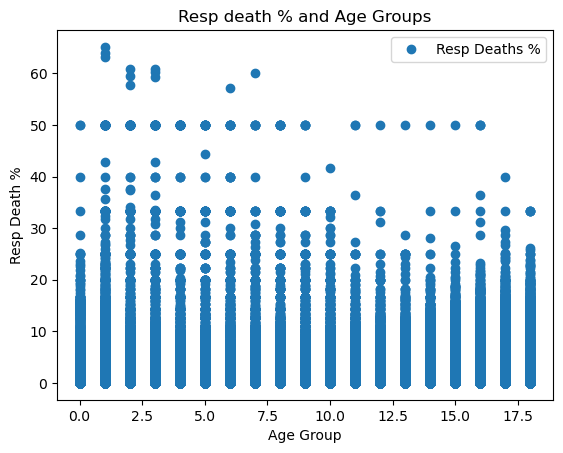

In [291]:
df.plot(x = 'Age Group Flag', y='Resp Deaths %',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Resp death % and Age Groups')  
plt.xlabel('Age Group')  
plt.ylabel('Resp Death %')  
plt.show()

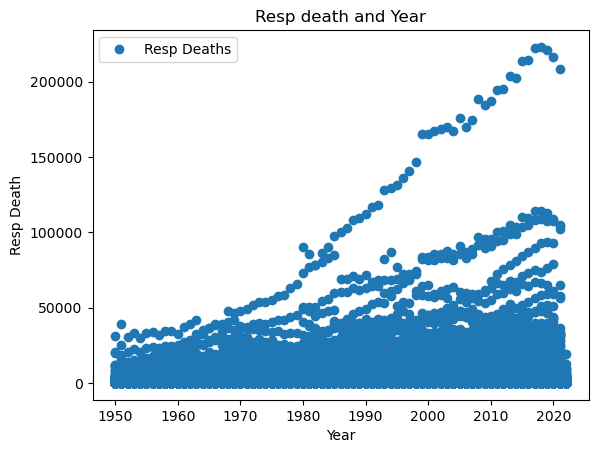

In [292]:
df.plot(x = 'Year', y='Resp Deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Resp death and Year')  
plt.xlabel('Year')  
plt.ylabel('Resp Death')  
plt.show()

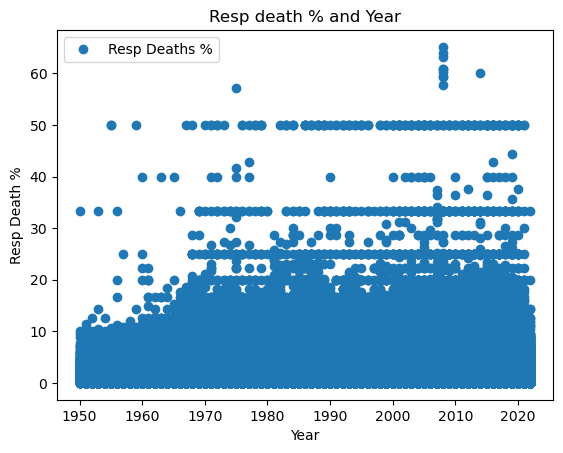

In [293]:
df.plot(x = 'Year', y='Resp Deaths %',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Resp death % and Year')  
plt.xlabel('Year')  
plt.ylabel('Resp Death %')  
plt.show()

# Hypothesis
Respiratory death percentages out of total deaths started to increase from 1950.

In [295]:
#Reshape the variables into NumPy arrays, 
#with X being the independent variable and y being the dependent variable.

In [296]:
X = df['Year'].values.reshape(-1,1)
y = df['Resp Deaths %'].values.reshape(-1,1)

In [297]:
X

array([[1987],
       [1987],
       [1987],
       ...,
       [2021],
       [2021],
       [2021]])

In [298]:
y

array([[3.22748028],
       [0.37650602],
       [1.11287758],
       ...,
       [2.50481696],
       [2.57159556],
       [2.61112218]])

In [299]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.3, random_state=0)

In [300]:
# Run a linear regression on the data.
#First, fit the model you created to the training set.
#Then, create a prediction for y on the test set.

In [301]:
# create a regression object. This is the regression object, which will be 
#fit onto the training set.
regression = LinearRegression()

In [302]:
#fit regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [303]:
#create a prediction for y on the test set.
y_predicted = regression.predict(X_test)

In [304]:
#Create a plot that shows the regression line on the test set.

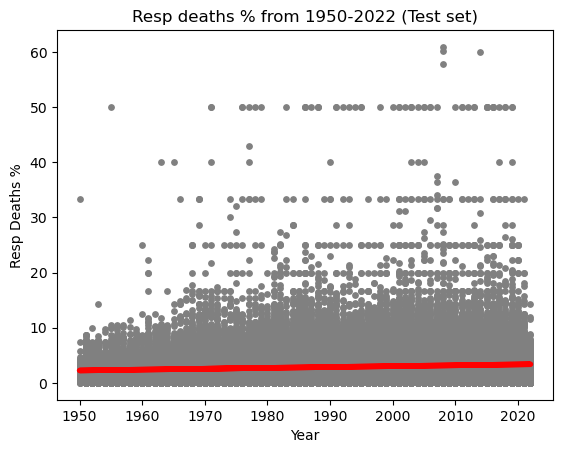

In [305]:
plot_test=plt
plot_test.scatter(X_test, y_test, color = 'gray' , s = 15)
plot_test.plot(X_test, y_predicted, color = 'red' , linewidth = 4)
plot_test.title('Resp deaths % from 1950-2022 (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel ('Resp Deaths %')
plot_test.show()

#### Write your own interpretation of how well the line appears to fit the data in a markdown cell.

Many data points lie outside of the line. Therefore, it seems that the line does not fit the data well. 

#### Check the model performance statistics—MSE and R2 score.

In [368]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [370]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0156348]]
Mean squared error:  10.603933166473348
R2 score:  0.007095998693486649


# Model performance statistics

#### The positive slope means that as X (year) rises, so does y (resp death %). 
#### MSE seems small. This means the regression line passes fairly close to observations.
#### r-squared value is less than 1%. This means that the model is not a good fit. 

In [398]:
#Compare the predicted y values with the actual y values in a dataframe.
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_predicted.flatten()})
df2.head(30)

,Actual,Predicted
0,0.735294,2.554154
1,2.522470,3.163911
2,1.913337,2.601058
3,0.000000,3.023198
4,4.624899,3.288989
5,1.208390,2.382171
6,0.000000,3.320259
7,2.355460,2.882485
8,1.578947,3.070102
9,0.749064,2.945024


##  As the predicted and actual values differ quite a bit, the model does not seem to have performed well. 

## Data bias

Some countries do not report mortality data to WHO. Furthermore, the data could be missing datapoints, for e.g. from low resourced countries who were not able to provide the data. 

Resp death % above 75% were removed, as it seemed unlikely that 1-3 total deaths formed 75-100% of all deaths, though this is based on personal judegment. 